In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/top50spotify2019/top50.csv


In [2]:
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
import numpy as np

In [4]:
shu =pd.read_csv('../input/top50spotify2019/top50.csv',encoding='ISO-8859-1',index_col=0)

In [5]:
shu.head(5)

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [6]:
from matplotlib import cm

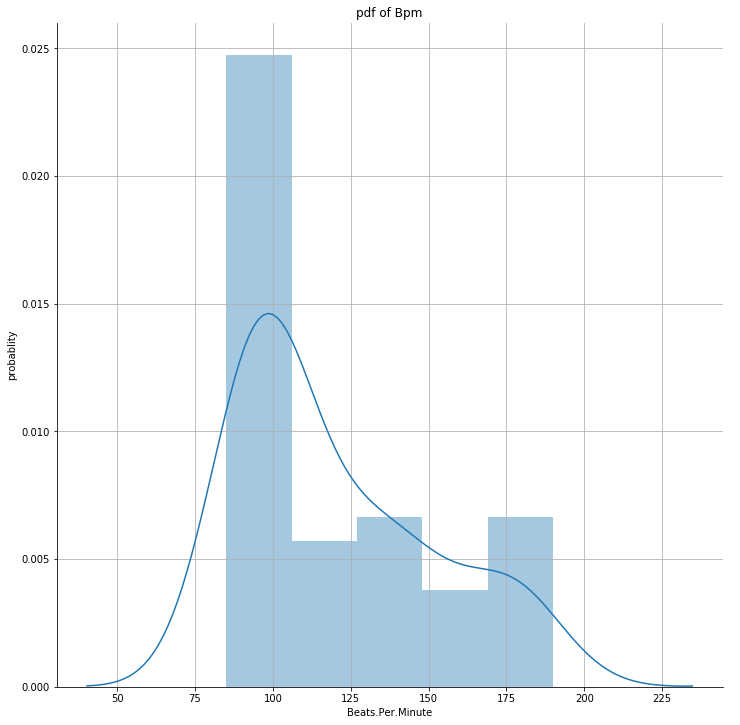

In [7]:
sns.FacetGrid(shu,height=10).map(sns.distplot,'Beats.Per.Minute').add_legend()
plt.title("pdf of Bpm")
plt.ylabel("probablity")
plt.grid()
plt.show()

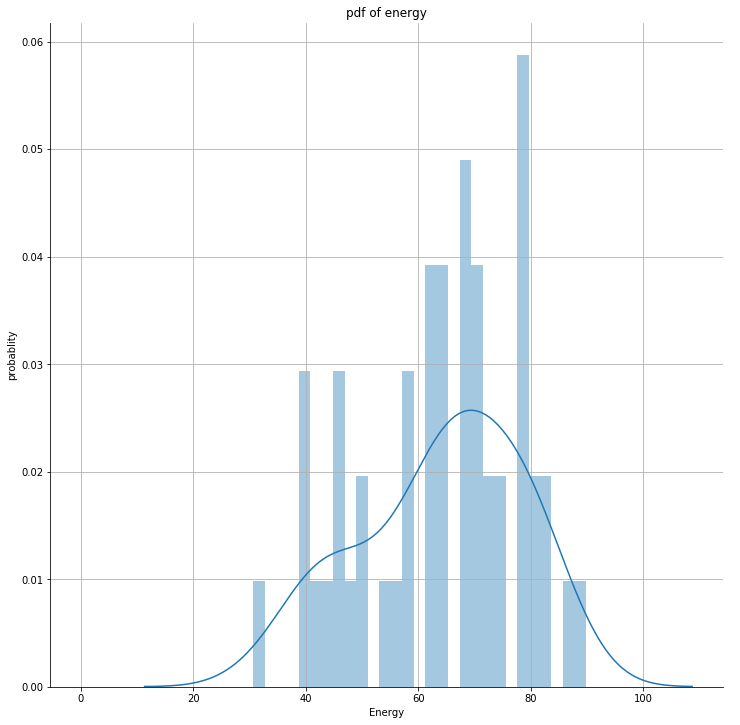

In [8]:
sns.FacetGrid(shu,height=10).map(sns.distplot,'Energy',bins=np.linspace(0,100,50)).add_legend()
plt.title("pdf of energy")
plt.ylabel("probablity")
plt.grid()
plt.show()

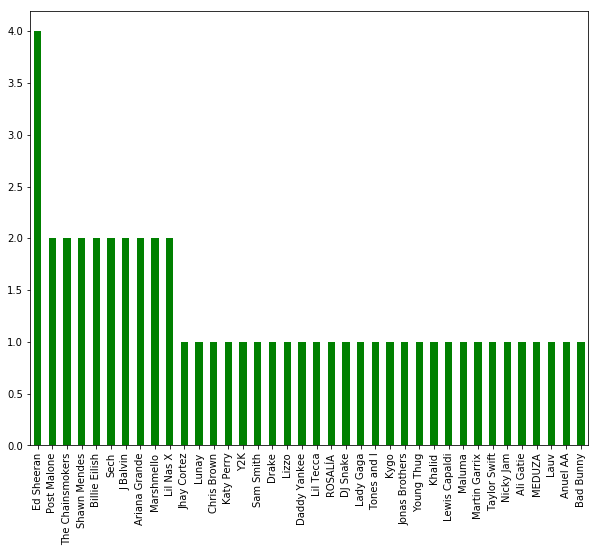

In [9]:
shu['Artist.Name'].value_counts().plot(kind='bar',figsize=(10,8),colormap=cm.get_cmap('ocean'))

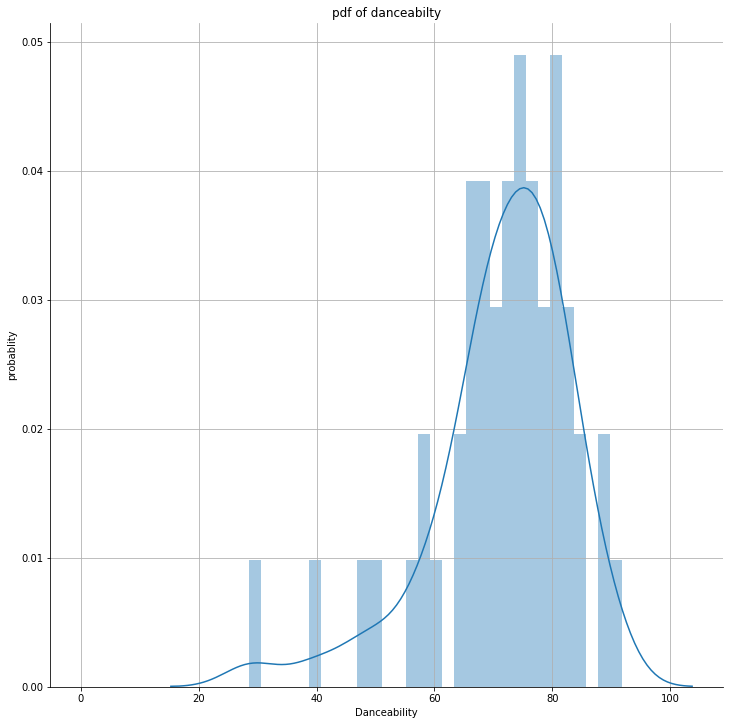

In [10]:
sns.FacetGrid(shu,height=10).map(sns.distplot,'Danceability',bins=np.linspace(0,100,50)).add_legend()
plt.title("pdf of danceabilty")
plt.ylabel("probablity")
plt.grid()
plt.show()

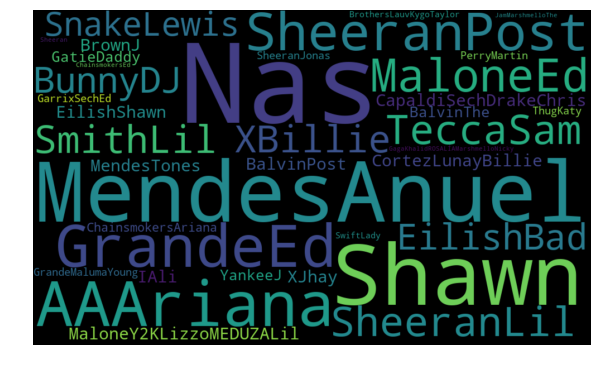

In [11]:
wordcloud=WordCloud(width=1000,height=600,max_font_size=200,max_words=150,background_color='black').generate("".join(shu['Artist.Name']))
plt.figure(figsize=[10,10])
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

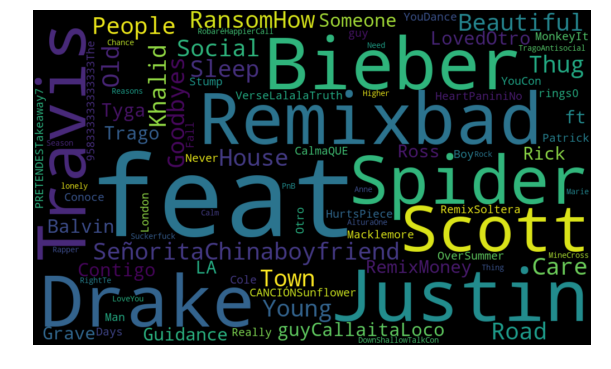

In [12]:
wordcloud=WordCloud(width=1000,height=600,max_font_size=200,max_words=150,background_color='black').generate("".join(shu['Track.Name']))
plt.figure(figsize=[10,10])
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
shu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 13 columns):
Track.Name          50 non-null object
Artist.Name         50 non-null object
Genre               50 non-null object
Beats.Per.Minute    50 non-null int64
Energy              50 non-null int64
Danceability        50 non-null int64
Loudness..dB..      50 non-null int64
Liveness            50 non-null int64
Valence.            50 non-null int64
Length.             50 non-null int64
Acousticness..      50 non-null int64
Speechiness.        50 non-null int64
Popularity          50 non-null int64
dtypes: int64(10), object(3)
memory usage: 5.5+ KB


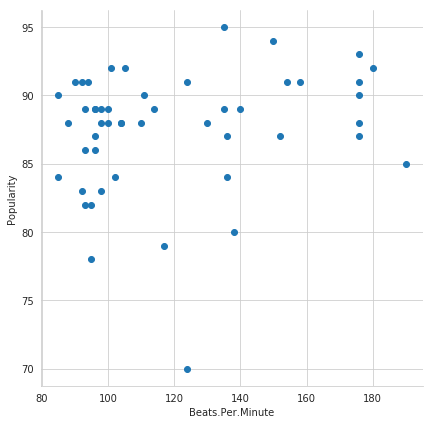

In [14]:
#bit-variante
sns.set_style("whitegrid")
sns.FacetGrid(shu,height=6).map(plt.scatter,'Beats.Per.Minute','Popularity').add_legend()
plt.show()

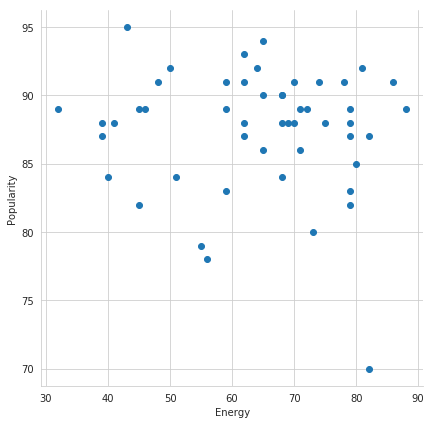

In [15]:
sns.set_style("whitegrid")
sns.FacetGrid(shu,height=6).map(plt.scatter,'Energy','Popularity').add_legend()
plt.show()

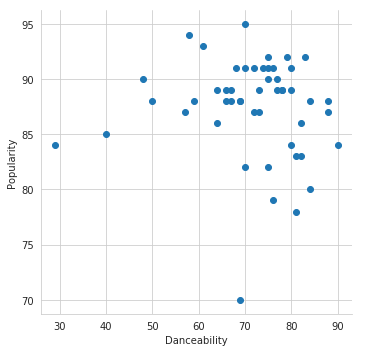

In [16]:
sns.set_style("whitegrid")
sns.FacetGrid(shu,height=5).map(plt.scatter,'Danceability','Popularity').add_legend()
plt.show()

In [17]:
shu.isnull().sum()

Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64

In [18]:
shu.rename(columns={'Track.Name':'Track_Name','Artist.Name':'Artist_Name','Beats.Per.Minute':'Beats_Per_Minute','Loudness..dB..':'Loudness_dB','Valence.':'Valence','Length.':'Length','Acousticness..':'Acousticness','Speechiness.':'Speechiness'},inplace=True)

In [19]:
shu.head()

,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Loudness_dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [20]:
data= shu.groupby('Artist_Name')

In [21]:
data.first()

,Track_Name,Genre,Beats_Per_Minute,Energy,Danceability,Loudness_dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
Artist_Name,,,,,,,,,,,,
Ali Gatie,It's You,canadian hip hop,96,46,73,-7,19,40,213,37,3,89
Anuel AA,China,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
Ariana Grande,boyfriend (with Social House),dance pop,190,80,40,-4,16,70,186,12,46,85
Bad Bunny,Callaita,reggaeton,176,62,61,-5,24,24,251,60,31,93
Billie Eilish,bad guy,electropop,135,43,70,-11,10,56,194,33,38,95
Chris Brown,No Guidance (feat. Drake),dance pop,93,45,70,-7,16,14,261,12,15,82
DJ Snake,Loco Contigo (feat. J. Balvin & Tyga),dance pop,96,71,82,-4,15,38,185,28,7,86
Daddy Yankee,Con Calma,latin,94,86,74,-3,6,66,193,11,6,91
Drake,Money In The Grave (Drake ft. Rick Ross),canadian hip hop,101,50,83,-4,12,10,205,10,5,92


In [22]:
data.get_group('Ed Sheeran')

,Track_Name,Genre,Beats_Per_Minute,Energy,Danceability,Loudness_dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
4,Beautiful People (feat. Khalid),pop,93,65,64,-8,8,55,198,12,19,86
6,I Don't Care (with Justin Bieber),pop,102,68,80,-5,9,84,220,9,4,84
38,Antisocial (with Travis Scott),pop,152,82,72,-5,36,91,162,13,5,87
50,Cross Me (feat. Chance the Rapper & PnB Rock),pop,95,79,75,-6,7,61,206,21,12,82


In [23]:
data_1 = shu.groupby('Popularity')

In [24]:
data_1.first().max()

Track_Name          fuck, i'm lonely (with Anne-Marie) - from 13 ...
Artist_Name                                              Shawn Mendes
Genre                                                  reggaeton flow
Beats_Per_Minute                                                  190
Energy                                                             82
Danceability                                                       88
Loudness_dB                                                        -4
Liveness                                                           24
Valence                                                            95
Length                                                            309
Acousticness                                                       75
Speechiness                                                        46
dtype: object

In [25]:
data_2 = shu.groupby(['Genre','Popularity'])

In [26]:
data_2.first()

Track_Name  \
Genre            Popularity                                                      
atl hip hop      89                  The London (feat. J. Cole & Travis Scott)   
australian pop   83                                               Dance Monkey   
big room         89          Summer Days (feat. Macklemore & Patrick Stump ...   
boy band         80                                                     Sucker   
brostep          88                                            One Thing Right   
canadian hip hop 88                                                     Lalala   
                 89                                                   It's You   
                 92                   Money In The Grave (Drake ft. Rick Ross)   
canadian pop     70                                        If I Can't Have You   
                 79                                                   Señorita   
country rap      87                                      Old Town Road - Remix   
                 91                                                     Panini   
dance pop        78          fuck, i'm lonely (with Anne-Marie) - from 13 ...   
                 82                                  No Guidance (feat. Drake)   
                 85                              boyfriend (with Social House)   
                 86                      Loco Contigo (feat. J. Balvin & Tyga)   
                 87                                                    Shallow   
                 89                                                    7 rings   
                 90                                      You Need To Calm Down   
dfw rap          91              Sunflower - Spider-Man: Into the Spider-Verse   
                 94                                Goodbyes (Feat. Young Thug)   
edm              84                                                   Takeaway   
                 88                                                Higher Love   
electropop       89                               bad guy (with Justin Bieber)   
                 95                                                    bad guy   
escape room      91                                                Truth Hurts   
latin            88                                                  Te Robaré   
                 89                                              QUE PRETENDES   
                 90                                                 LA CANCIÓN   
                 91                                            Soltera - Remix   
panamanian pop   87                                         Otro Trago - Remix   
                 91                                                 Otro Trago   
pop              82              Cross Me (feat. Chance the Rapper & PnB Rock)   
                 84                          I Don't Care (with Justin Bieber)   
                 86                            Beautiful People (feat. Khalid)   
                 87                             Antisocial (with Travis Scott)   
                 88                                          Someone You Loved   
                 90                                          How Do You Sleep?   
pop house        91                                        Piece Of Your Heart   
r&b en espanol   88                                                 Con Altura   
reggaeton        89                                          0.958333333333333   
                 93                                                   Callaita   
reggaeton flow   83                                       No Me Conoce - Remix   
                 92                                                      China   
trap music       92                                                     Ransom   

                                  Artist_Name  Beats_Per_Minute  Energy  \
Genre            Popularity                                               
atl hip hop      89                Young Thug                98

In [27]:
tag="Shawn Mendes"
shu['relevent']=shu["Artist_Name"].fillna("").apply(lambda x:1 if tag.lower() in x.lower() else 0)
small = shu[shu['relevent']==1]
small[["Track_Name","Genre","Popularity"]]

,Track_Name,Genre,Popularity
1,Señorita,canadian pop,79
26,If I Can't Have You,canadian pop,70


In [28]:
tag="Ed Sheeran"
shu['relevent']=shu["Artist_Name"].fillna("").apply(lambda x:1 if tag.lower() in x.lower() else 0)
small = shu[shu['relevent']==1]
small[["Track_Name","Genre","Popularity"]]

,Track_Name,Genre,Popularity
4,Beautiful People (feat. Khalid),pop,86
6,I Don't Care (with Justin Bieber),pop,84
38,Antisocial (with Travis Scott),pop,87
50,Cross Me (feat. Chance the Rapper & PnB Rock),pop,82


In [29]:
small =shu.sort_values("Beats_Per_Minute",ascending=True)
small =small[small['Energy']!=""]
small[["Track_Name","Beats_Per_Minute"]][:20]

,Track_Name,Beats_Per_Minute
31,Takeaway,85
42,You Need To Calm Down,85
46,One Thing Right,88
18,Sunflower - Spider-Man: Into the Spider-Verse,90
24,Soltera - Remix,92
23,No Me Conoce - Remix,92
30,QUE PRETENDES,93
4,Beautiful People (feat. Khalid),93
16,No Guidance (feat. Drake),93
29,Con Calma,94


In [30]:
small =shu.sort_values("Energy",ascending=True)
small =small[small['Beats_Per_Minute']!=""]
small[["Track_Name","Energy"]][:20]

,Track_Name,Energy
32,7 rings,32
43,Shallow,39
19,Lalala,39
44,Talk,40
13,Someone You Loved,41
10,bad guy,43
25,bad guy (with Justin Bieber),45
16,No Guidance (feat. Drake),45
28,It's You,46
18,Sunflower - Spider-Man: Into the Spider-Verse,48
